<a href="https://colab.research.google.com/github/Rishikr15/Supervised-ML-Algorithms/blob/main/DecisionTree_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Algorithm

**Import necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

**Load the dataset**

In [3]:
# Assuming the dataset is in a CSV file named 'PlayTennis.csv'
df = pd.read_csv('/content/PlayTennis.csv')

**Dataset Visualization**

In [4]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [5]:
df.shape

(14, 5)

**EDA**

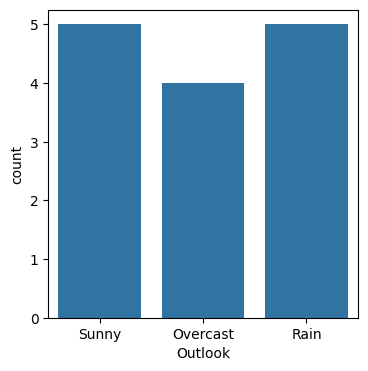

In [6]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Outlook'])
plt.show()

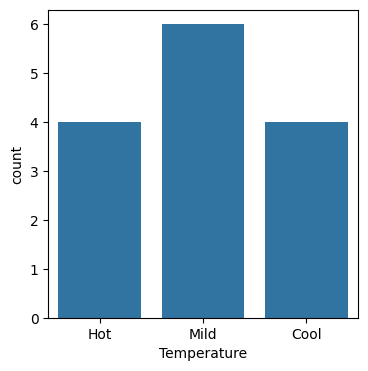

In [7]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Temperature'])
plt.show()

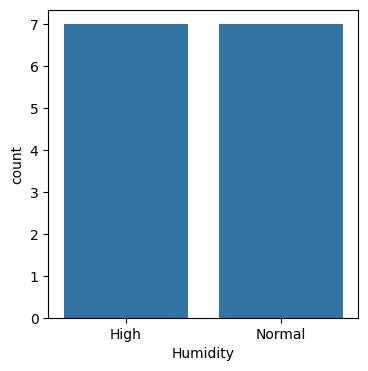

In [8]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Humidity'])
plt.show()

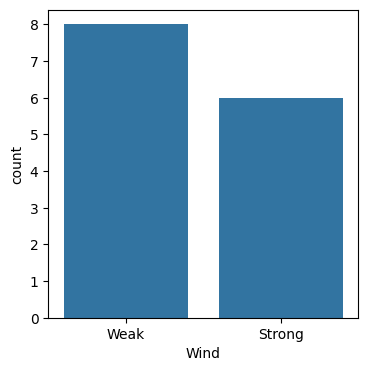

In [9]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Wind'])
plt.show()

**Feature Extraction**

In [10]:
# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column 'PlayTennis'

**Use OneHotEncoder for categorical variables in features**

In [11]:
categorical_features = ['Outlook', 'Temperature', 'Humidity', 'Wind']

preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)

**Use LabelEncoder for the target variable**

In [12]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

**Split the dataset into training and testing sets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

**Create a Decision Tree classifier**

In [14]:
dt_classifier = DecisionTreeClassifier(criterion="gini", random_state=42)

**Fit the model to the training data**

In [15]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Make predictions on the test set**

In [16]:
y_pred = dt_classifier.predict(X_test)

**Evaluate the performance of the classifier**

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

**Print the results**

DT Accuracy: 1.0
DT Confusion Matrix:
[[1 0]
 [0 2]]
DT Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



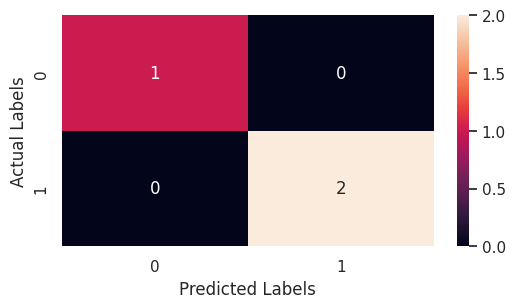

In [18]:
print(f'DT Accuracy: {accuracy}')
print(f'DT Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print(f'DT Classification Report:\n{classification_report_str}')

**Predict whether a targeted audience or person will purchase the product or not**

In [19]:
# Assuming we have a new set of feature values for prediction
new_data = pd.DataFrame({'Outlook': ['Sunny'], 'Temperature': ['Hot'], 'Humidity': ['High'], 'Wind': ['Weak']})

# Encode categorical variables using the same OneHotEncoder
new_data_encoded = preprocessor.transform(new_data)

# Use the trained DT model to make predictions
predicted_play_tennis = dt_classifier.predict(new_data_encoded)

# Print the predicted outcome
if predicted_play_tennis[0] == 1:
    print("The person is predicted to play tennis.")
else:
    print("The person is predicted not to play tennis.")

The person is predicted not to play tennis.


**Output Visualization using Bar Plot**

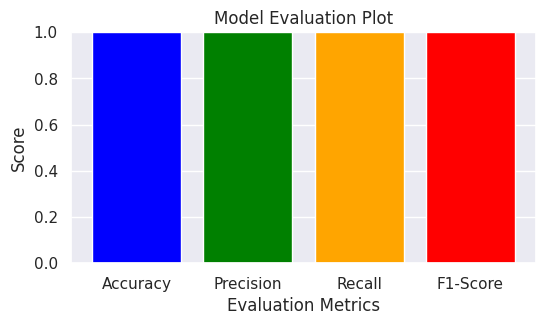

In [20]:
# Assuming we have already evaluated the model and obtained these metrics, hence plotting the same in a bar plot
accuracy = 1.0
precision = 1.0
recall = 1.0
f1_score = 1.0

# Plotting the bar plot
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1
plt.title('Model Evaluation Plot')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.show()

**Plot the decision tree**

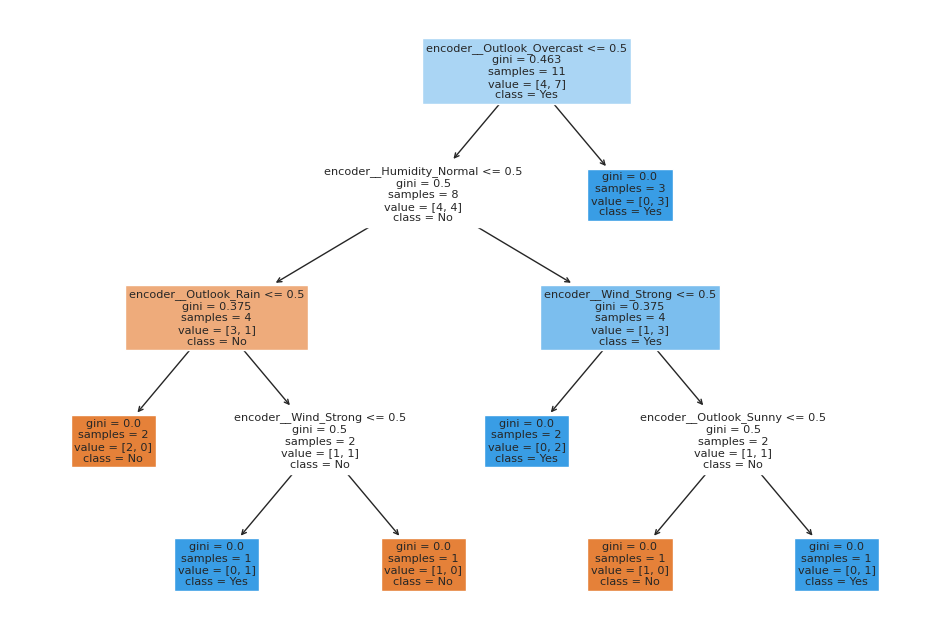

In [21]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=list(preprocessor.get_feature_names_out(X.columns)), class_names=list(label_encoder.classes_))

# Save the plot as a PDF file
plt.savefig('decision_tree_plot.pdf')

# Show the plot
plt.show()

**ROC Curve Plotting for the above Decision Tree Model**

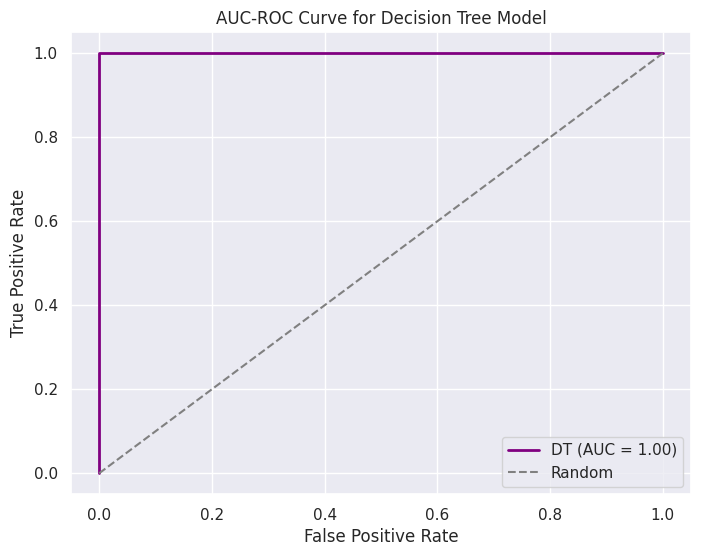

In [22]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test is the actual labels
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
dt_predicted_scores = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for DT model
dt_fpr, dt_tpr, _ = roc_curve(y_test_binary, dt_predicted_scores)

# Compute AUC for DT model
dt_roc_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')

plt.plot(dt_fpr, dt_tpr, color='purple', lw=2, label=f'DT (AUC = {dt_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.show()